In [32]:
import os,sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from fbprophet import Prophet
import warnings
%matplotlib inline
os.chdir('C:/Users/arpit.goel/Documents/Projects/Kaggle/15.RecruitRestarauntPrediction')

df_air_visit_data=pd.read_csv('01.RawData/air_visit_data.csv',parse_dates=['visit_date'])
df_date_info=pd.read_csv('01.RawData/date_info.csv',parse_dates=['calendar_date'])
df_sample_submission=pd.read_csv('01.RawData/sample_submission.csv')
df_holidays=pd.read_csv('01.RawData/holidays.csv',parse_dates=['ds'])
df_air_visit_data.loc[:,'y']=np.log(1+df_air_visit_data.loc[:,'visitors'])
df_air_visit_data['ds']=df_air_visit_data['visit_date']

In [22]:
sample=df_air_visit_data[df_air_visit_data['air_store_id']=='air_81a12d67c22e012f']

m=Prophet(yearly_seasonality=True,holidays=df_holidays)
m.fit(sample)
future = m.make_future_dataframe(periods=39)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
forecast[['yhat','ds']][-39:]

,yhat,ds
407,1.600644,2017-04-23
408,2.838955,2017-04-24
409,2.891995,2017-04-25
410,3.006996,2017-04-26
411,2.955515,2017-04-27
412,3.189373,2017-04-28
413,1.284400,2017-04-29
414,1.473397,2017-04-30
415,2.938169,2017-05-01
416,3.476438,2017-05-02


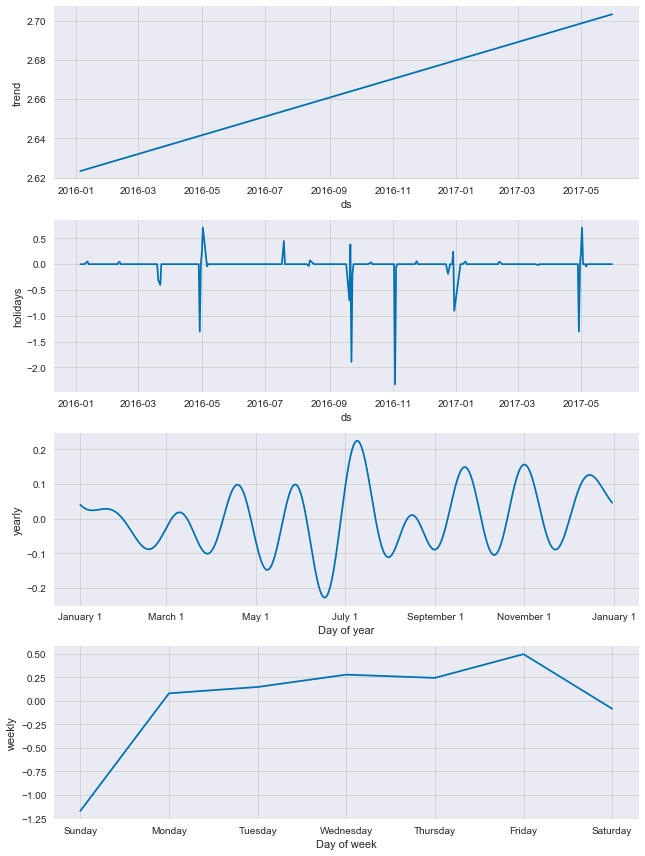

In [23]:
forecast = m.predict(future)
m.plot_components(forecast);

In [34]:
warnings.filterwarnings("ignore")
all_predictions=[]
for name,group in df_air_visit_data.groupby(['air_store_id']):
    m=Prophet(yearly_seasonality=True,holidays=df_holidays,daily_seasonality=False)
    m.fit(sample)
    future = m.make_future_dataframe(periods=39)
    output=forecast[['yhat','ds']][-39:]
    output['air_store_id']=name
    all_predictions.append(output)

In [35]:
predictions=pd.concat(all_predictions)
predictions.index=predictions['air_store_id']+'_'+predictions['ds'].map(lambda x: x.strftime('%Y-%m-%d'))
predictions=np.round(np.exp(predictions['yhat'])-1)
df_sample_submission=pd.read_csv('01.RawData/sample_submission.csv')
df_sample_submission['visitors']=df_sample_submission['id'].map(predictions)
df_sample_submission.to_csv('03.Submissions/7.Prophet.csv',index=False)